In [38]:
#importing Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot

In [3]:
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [39]:
#Extracting Data

In [4]:
d = pd.read_csv('cancer_classification.csv')

In [40]:
#Exploring Data

In [5]:
d.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
d.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [37]:
#Checking inconsistency of Data

<AxesSubplot:>

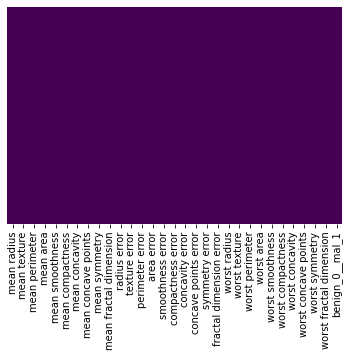

In [8]:
sns.heatmap(d.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Choosing features and classification label

In [9]:
x = d.drop('benign_0__mal_1',axis=1).values
y = d['benign_0__mal_1'].values

In [ ]:
#Splitting Dataset into training and testing sets

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=101)

In [42]:
#Scaling the Data

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(xtrain)

MinMaxScaler()

In [13]:
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [41]:
#Building the model

In [14]:
model = Sequential()

In [15]:
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [17]:
early_stop = EarlyStopping(monitor='val_loss',verbose=1,patience=25,mode='min')

In [43]:
#Training the Model

In [18]:
model.fit(x=xtrain,y=ytrain,epochs=600,verbose=1,callbacks=[early_stop],validation_data=(xtest,ytest))

Epoch 1/600
13/13 [==============================] - 4s 47ms/step - loss: 0.6915 - val_loss: 0.6735
Epoch 2/600
13/13 [==============================] - 0s 11ms/step - loss: 0.6695 - val_loss: 0.6537
Epoch 3/600
13/13 [==============================] - 0s 10ms/step - loss: 0.6483 - val_loss: 0.6326
Epoch 4/600
13/13 [==============================] - 0s 8ms/step - loss: 0.6309 - val_loss: 0.6132
Epoch 5/600
13/13 [==============================] - 0s 7ms/step - loss: 0.6115 - val_loss: 0.5926
Epoch 6/600
13/13 [==============================] - 0s 7ms/step - loss: 0.5906 - val_loss: 0.5720
Epoch 7/600
13/13 [==============================] - 0s 7ms/step - loss: 0.5827 - val_loss: 0.5557
Epoch 8/600
13/13 [==============================] - 0s 7ms/step - loss: 0.5557 - val_loss: 0.5291
Epoch 9/600
13/13 [==============================] - 0s 7ms/step - loss: 0.5415 - val_loss: 0.5043
Epoch 10/600
13/13 [==============================] - 0s 8ms/step - loss: 0.5132 - val_loss: 0.4775
Epoch 

Epoch 83/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0861 - val_loss: 0.1325
Epoch 84/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0893 - val_loss: 0.1326
Epoch 85/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1108 - val_loss: 0.1421
Epoch 86/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1013 - val_loss: 0.1353
Epoch 87/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1064 - val_loss: 0.1315
Epoch 88/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0819 - val_loss: 0.1478
Epoch 89/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0814 - val_loss: 0.1308
Epoch 90/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0954 - val_loss: 0.1296
Epoch 91/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0977 - val_loss: 0.1315
Epoch 92/600
13/13 [==============================] - 0s 10ms/step - loss: 0.0878 - val_loss: 0.1346

In [19]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

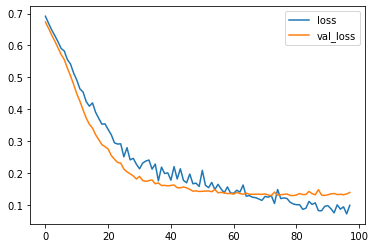

In [20]:
model_loss.plot()

In [44]:
#Evaluating the performance of the model

In [21]:
predictions = model.predict(xtest)

6/6 [==============================] - 0s 4ms/step


In [31]:
metrics.mean_squared_error(ytest,predictions)*100

3.1711445436935612

In [32]:
metrics.mean_absolute_error(ytest,predictions)*100

6.054449039312098

In [33]:
np.sqrt(metrics.mean_squared_error(ytest,predictions))*100

17.80770772360542

In [35]:
metrics.average_precision_score(ytest,predictions)*100

98.5360585197044